In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random

from ggplot import *

/home/akash/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:66: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/akash/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/akash/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('Train.csv')
df.head(10)

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,...,0.0,0.0,0.00000,0.4236,0.0,0.0,0.9920,0.0,0.98830,0.9920
1,9,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.0196,0.0,0.0,0.0000,0.0,0.99600,0.1451
2,4,0.5605,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.98830,...,0.0,0.0,0.21180,0.9883,0.0,0.0,0.0000,0.0,0.98830,0.9883
3,0,1.0000,0.9883,0.0,0.0,0.0,0.0000,0.0,0.9920,0.98830,...,0.0,0.0,0.02353,0.9883,0.0,0.0,0.9883,0.0,0.00000,0.9883
4,6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,...,0.0,0.0,0.00000,0.1921,0.0,0.0,0.6313,0.0,0.12550,0.5410
5,2,0.3452,0.9920,0.0,0.0,0.0,0.1569,0.0,0.2157,0.00000,...,0.0,0.0,0.00000,0.1608,0.0,0.0,0.0000,0.0,0.99600,0.9920
6,7,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.3293,0.0,0.0,0.8900,0.0,0.05100,0.9920
7,8,0.9920,0.8237,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,...,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0000,0.0,0.26660,0.9920
8,8,0.5566,0.9330,0.0,0.0,0.0,0.0000,0.0,0.9920,0.04706,...,0.0,0.0,0.99200,0.8000,0.0,0.0,0.9214,0.0,0.00000,0.2744
9,7,0.1843,0.0000,0.0,0.0,0.0,0.0000,0.0,0.6510,0.00000,...,0.0,0.0,0.00000,0.3137,0.0,0.0,0.9960,0.0,0.01569,0.9960


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to feature_784
dtypes: float64(784), int64(1)
memory usage: 359.3 MB


In [4]:
df.describe()

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.000000,60000.000000,60000.000000
mean,4.453933,0.150047,0.273627,0.000363,0.000087,0.017835,0.084351,0.000683,0.303340,0.251321,...,0.006671,0.000038,0.278080,0.393026,0.000027,0.0,0.489655,0.004091,0.441614,0.468356
std,2.889270,0.319200,0.396285,0.014712,0.007645,0.112505,0.242649,0.022328,0.407942,0.387669,...,0.071006,0.003626,0.397938,0.432747,0.003198,0.0,0.435129,0.051939,0.438865,0.435704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.125500,0.000000,0.0,0.502000,0.000000,0.306000,0.427500
75%,7.000000,0.000000,0.608000,0.000000,0.000000,0.000000,0.000000,0.000000,0.733400,0.502000,...,0.000000,0.000000,0.623500,0.945300,0.000000,0.0,0.988300,0.000000,0.988300,0.988300
max,9.000000,1.000000,1.000000,0.996000,0.988300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.588400,1.000000,1.000000,0.525400,0.0,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().values.any()

False

## No **NULL** values. So no need to impute the missing values

In [6]:
for col in df.columns[1:]:
    if max(df[col]) > 1:
        print(max(df[col]))

In [7]:
df['label'].unique()

array([6, 9, 4, 0, 2, 7, 8, 5, 3, 1])

## classification problem of dividing in 10 classes

In [8]:
y = df['label']
X = df.drop('label',axis=1)
X.head(10)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_775,feature_776,feature_777,feature_778,feature_779,feature_780,feature_781,feature_782,feature_783,feature_784
0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.9570,...,0.0,0.0,0.00000,0.4236,0.0,0.0,0.9920,0.0,0.98830,0.9920
1,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9920,...,0.0,0.0,0.00000,0.0196,0.0,0.0,0.0000,0.0,0.99600,0.1451
2,0.5605,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.98830,0.0000,...,0.0,0.0,0.21180,0.9883,0.0,0.0,0.0000,0.0,0.98830,0.9883
3,1.0000,0.9883,0.0,0.0,0.0,0.0000,0.0,0.9920,0.98830,0.0000,...,0.0,0.0,0.02353,0.9883,0.0,0.0,0.9883,0.0,0.00000,0.9883
4,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.9883,0.00000,0.1686,...,0.0,0.0,0.00000,0.1921,0.0,0.0,0.6313,0.0,0.12550,0.5410
5,0.3452,0.9920,0.0,0.0,0.0,0.1569,0.0,0.2157,0.00000,0.0000,...,0.0,0.0,0.00000,0.1608,0.0,0.0,0.0000,0.0,0.99600,0.9920
6,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.0000,...,0.0,0.0,0.00000,0.3293,0.0,0.0,0.8900,0.0,0.05100,0.9920
7,0.9920,0.8237,0.0,0.0,0.0,0.0000,0.0,0.0000,0.00000,0.9960,...,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0000,0.0,0.26660,0.9920
8,0.5566,0.9330,0.0,0.0,0.0,0.0000,0.0,0.9920,0.04706,0.4707,...,0.0,0.0,0.99200,0.8000,0.0,0.0,0.9214,0.0,0.00000,0.2744
9,0.1843,0.0000,0.0,0.0,0.0,0.0000,0.0,0.6510,0.00000,0.0000,...,0.0,0.0,0.00000,0.3137,0.0,0.0,0.9960,0.0,0.01569,0.9960


In [9]:
for col in df.columns:
    if df[col].dtype == np.int64:
        print(col)
    if df[col].dtype == str:
        print(col)

label


### sklearn imports

In [10]:
import sklearn
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MeanShift

In [11]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)
pca_result

array([[-0.53560351,  0.38106961,  1.81910287,  1.02687534],
       [-3.02723312,  1.17834341,  1.23587851, -1.95037787],
       [ 0.94908376,  3.37998871,  2.35548774,  1.10750868],
       ..., 
       [ 4.25461431, -2.40925258,  2.05003752, -1.80349422],
       [ 2.65352952, -0.74744701,  4.18896429,  0.44663889],
       [ 1.21202589,  0.73943575, -2.40902275,  0.6474955 ]])

In [12]:
pca.explained_variance_ratio_

array([ 0.0970466 ,  0.07095916,  0.06169076,  0.05389397])

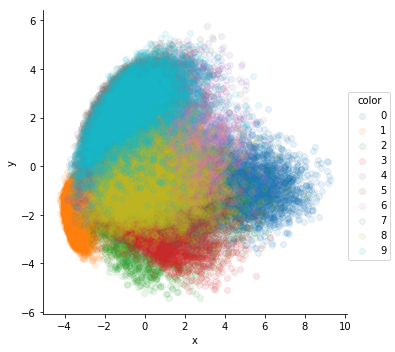

In [13]:
plot_df = pd.DataFrame(dict(x=pca_result[:,0], y=pca_result[:,1], color=y.values))

sns.lmplot('x', 'y', data=plot_df, hue='color', fit_reg=False,scatter_kws={'alpha':0.1})

# fig, ax = plt.subplots()

# colors = {'0':'red','1':'blue','2':'green','3':'black','4':'cyan','5':'magneta','6':'yellow','7':'white','8':'#eeefff','9':'red'}

# ax.scatter(df['x'], df['y'], c=df['color'].apply(lambda a: colors[a]))

plt.show()

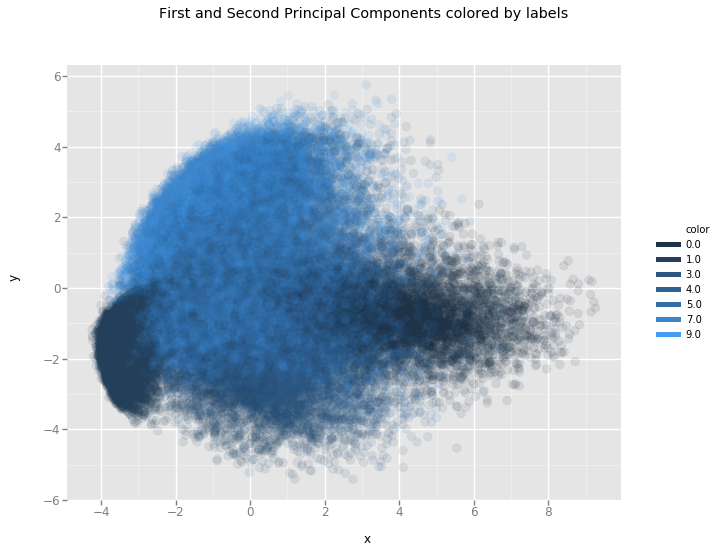

<ggplot: (-9223363260702793952)>

In [14]:
ggplot(plot_df,aes(x='x',y='y',color='color')) + geom_point(size=75,alpha=0.1) + ggtitle("First and Second Principal Components colored by labels")

### 50 features represent nearly 82.5% data 

In [20]:
pca_50 = PCA(n_components=50)
pca_50_results = pca_50.fit_transform(X_train)
pca_50_results

array([[-1.25943191, -0.77866782, -3.4749038 , ..., -0.15208683,
         0.19563611, -0.11171627],
       [ 1.52522086,  4.61414326,  0.80940588, ...,  0.54955943,
        -0.10782037,  0.17241052],
       [-0.39000169,  1.80724523,  1.22856039, ..., -0.30212397,
        -0.33782431,  0.72637993],
       ..., 
       [-0.89546548,  1.39589016,  0.27762022, ..., -0.03027074,
        -0.50405699,  1.02026064],
       [-0.1429175 , -0.31253816,  0.95032892, ...,  0.85581886,
         0.79908038,  0.14527834],
       [-3.48913708, -1.6045303 ,  0.27811048, ..., -0.01780448,
         0.17951319,  0.0777861 ]])

In [21]:
np.sum(pca_50.explained_variance_ratio_)

0.82467765111312852

### 100 features represent 91% data

In [24]:
pca_100 = PCA(n_components=100)
pca_100_results = pca_100.fit_transform(X_train)
pca_100_results

array([[-1.25943191, -0.77866782, -3.47490382, ...,  0.43324393,
        -0.09197626, -0.14856208],
       [ 1.52522086,  4.61414327,  0.80940588, ..., -0.0466529 ,
         0.20999724, -0.151632  ],
       [-0.39000169,  1.80724524,  1.2285604 , ..., -0.36742305,
         0.26162834, -0.06082431],
       ..., 
       [-0.89546548,  1.39589016,  0.27762024, ..., -0.04032907,
         0.42304766, -0.10702531],
       [-0.1429175 , -0.31253816,  0.95032893, ..., -0.18315242,
         0.11328914,  0.00528907],
       [-3.48913708, -1.6045303 ,  0.27811048, ...,  0.03315864,
         0.05328188,  0.04898509]])

In [25]:
np.sum(pca_100.explained_variance_ratio_)

0.91431133844549006

#### TRAIN_TEST_SPLIT

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=int(len(X)/6),random_state=42)

In [16]:
X_test.shape,y_test.shape

((10000, 784), (10000,))

In [17]:
X_train.shape,y_train.shape

((50000, 784), (50000,))

In [18]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=int(len(X_train)/5),random_state=21)

In [19]:
X_train.shape,X_val.shape

((40000, 784), (10000, 784))

### Transfor X_val,X_test and transform all into numpy array

In [26]:
X_train_50_np = pca_50_results
X_train_50_np

array([[-1.25943191, -0.77866782, -3.4749038 , ..., -0.15208683,
         0.19563611, -0.11171627],
       [ 1.52522086,  4.61414326,  0.80940588, ...,  0.54955943,
        -0.10782037,  0.17241052],
       [-0.39000169,  1.80724523,  1.22856039, ..., -0.30212397,
        -0.33782431,  0.72637993],
       ..., 
       [-0.89546548,  1.39589016,  0.27762022, ..., -0.03027074,
        -0.50405699,  1.02026064],
       [-0.1429175 , -0.31253816,  0.95032892, ...,  0.85581886,
         0.79908038,  0.14527834],
       [-3.48913708, -1.6045303 ,  0.27811048, ..., -0.01780448,
         0.17951319,  0.0777861 ]])

In [27]:
X_train_100_np = pca_100_results
X_train_100_np

array([[-1.25943191, -0.77866782, -3.47490382, ...,  0.43324393,
        -0.09197626, -0.14856208],
       [ 1.52522086,  4.61414327,  0.80940588, ..., -0.0466529 ,
         0.20999724, -0.151632  ],
       [-0.39000169,  1.80724524,  1.2285604 , ..., -0.36742305,
         0.26162834, -0.06082431],
       ..., 
       [-0.89546548,  1.39589016,  0.27762024, ..., -0.04032907,
         0.42304766, -0.10702531],
       [-0.1429175 , -0.31253816,  0.95032893, ..., -0.18315242,
         0.11328914,  0.00528907],
       [-3.48913708, -1.6045303 ,  0.27811048, ...,  0.03315864,
         0.05328188,  0.04898509]])

In [90]:
X_val_50_np = pca_50.transform(X_val)
X_test_50_np = pca_50.transform(X_test)

In [31]:
X_val_100_np = pca_100.transform(X_val)
X_test_100_np = pca_100.transform(X_test)

## Consider two models DT and NN

### NN

In [91]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Add,Dropout
from keras import optimizers,losses
from keras.callbacks import History,ModelCheckpoint
from keras.utils.np_utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

ImportError: numpy.core.multiarray failed to import

In [43]:
model = Sequential()
model.add(Dense(units=256,input_shape=(50,),activation='relu',use_bias=True))
model.add(Dropout(0.1))
model.add(Dense(units=256,activation='relu',use_bias=True))
model.add(Dropout(0.1))
model.add(Dense(units=10,activation='softmax',use_bias=True))

In [44]:
model.compile(optimizer = optimizers.SGD(lr=0.01,momentum=0.9),loss = losses.categorical_crossentropy,metrics=['accuracy'])

In [45]:
checkpoint = ModelCheckpoint('./model_pca_50.h5',
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

In [46]:
def my_generator(x_data,y_data,batch_size):
    L = len(x_data)
    while True:
        batch_start = 0
        batch_end = batch_size
        while batch_start < L:
            end = min(batch_end,L)
            x_batch = x_data[batch_start:end]
            y_batch = y_data[batch_start:end]
            yield (x_batch,y_batch)
            batch_start += batch_size
            batch_end += batch_size

In [47]:
fit = model.fit_generator(my_generator(X_train_50_np,to_categorical(y_train.values),32),
                          steps_per_epoch=len(X_train_50_np)/32,
                          epochs=50,
                          callbacks=[checkpoint],
                          validation_data=my_generator(X_val_50_np,to_categorical(y_val.values),16),
                          validation_steps=len(X_val_50_np)/16)

Epoch 1/50
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3055 - acc: 0.9081 - val_loss: 0.1490 - val_acc: 0.9554
Epoch 2/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1393 - acc: 0.9579 - val_loss: 0.1145 - val_acc: 0.9663
Epoch 3/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.1039 - acc: 0.9670 - val_loss: 0.1007 - val_acc: 0.9706
Epoch 4/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0826 - acc: 0.9737 - val_loss: 0.0950 - val_acc: 0.9727
Epoch 5/50
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0705 - acc: 0.9770 - val_loss: 0.0869 - val_acc: 0.9757
Epoch 6/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0592 - acc: 0.9805 - val_loss: 0.0861 - val_acc: 0.9764
Epoch 7/50
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0519 - acc: 0.9830 - val_loss: 0.0835 - val_acc: 0.9764
Epoch 8/50
1250/1250 [==============================] - 7s 5ms

In [49]:
def print_best_model_results(model_hist):
    best_epoch = np.argmax(model_hist['val_acc'])
    print('epoch:', best_epoch+1,', val_acc:', model_hist['val_acc'][best_epoch],', val_loss:',model_hist['val_loss'][best_epoch])

In [58]:
def plot_metrics(hist, stop=50):  # stop -> no of data pts in plot\n",
    fig,(ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax0.plot(range(stop), hist['acc'], label='Training', color='#FF533D'),
    ax0.plot(range(stop), hist['val_acc'], label='Validation', color='#03507E'),
    ax0.set_title('Accuracy'),
    ax0.set_ylabel('Accuracy'),
    ax0.set_xlabel('Epoch'),
    ax0.legend(loc='lower right'),

    ax1.plot(range(stop), hist['loss'], label='Training', color='#FF533D'),
    ax1.plot(range(stop), hist['val_loss'],label='Validation', color='#03507E'),
    ax1.set_title('Loss'),
    ax1.set_ylabel('Loss'),
    ax1.set_xlabel('Epoch'),
    ax1.legend(loc='upper right'),
 
    plt.tight_layout(),
   
    print("Best Model: "),
    print_best_model_results(hist)

Best Model: 
epoch: 49 , val_acc: 0.9829 , val_loss: 0.0888105260734


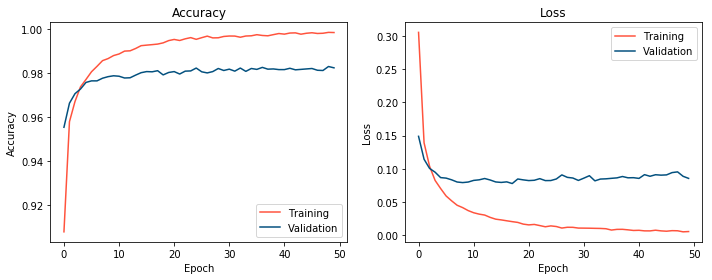

In [59]:
plot_metrics(fit.history)

In [68]:
model1 = Sequential()
model1.add(Dense(units=512,input_shape=(100,),activation='relu',use_bias=True))
model1.add(Dropout(0.1))
model1.add(Dense(units=512,activation='relu',use_bias=True))
model1.add(Dropout(0.1))
model1.add(Dense(units=10,activation='softmax',use_bias=True))

In [69]:
model1.compile(optimizer = optimizers.SGD(lr=0.001,momentum=0.9),loss = losses.categorical_crossentropy,metrics=['accuracy'])

In [70]:
checkpoint1 = ModelCheckpoint('./model_pca_100.h5',
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto')

In [71]:
fit1 = model1.fit_generator(my_generator(X_train_100_np,to_categorical(y_train.values),32),
                          steps_per_epoch=len(X_train_100_np)/32,
                          epochs=50,
                          callbacks=[checkpoint1],
                          validation_data=my_generator(X_val_100_np,to_categorical(y_val.values),16),
                          validation_steps=len(X_val_100_np)/16)

Epoch 1/50
1250/1250 [==============================] - 12s 9ms/step - loss: 0.7702 - acc: 0.8027 - val_loss: 0.3497 - val_acc: 0.9037
Epoch 2/50
1250/1250 [==============================] - 11s 9ms/step - loss: 0.3090 - acc: 0.9120 - val_loss: 0.2554 - val_acc: 0.9249
Epoch 3/50
1250/1250 [==============================] - 12s 9ms/step - loss: 0.2413 - acc: 0.9299 - val_loss: 0.2137 - val_acc: 0.9377
Epoch 4/50
1250/1250 [==============================] - 12s 9ms/step - loss: 0.2043 - acc: 0.9401 - val_loss: 0.1883 - val_acc: 0.9454
Epoch 5/50
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1791 - acc: 0.9473 - val_loss: 0.1706 - val_acc: 0.9503
Epoch 6/50
1250/1250 [==============================] - 13s 10ms/step - loss: 0.1619 - acc: 0.9528 - val_loss: 0.1580 - val_acc: 0.9536
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 0.1466 - acc: 0.9560 - val_loss: 0.1466 - val_acc: 0.9566
Epoch 8/50
1250/1250 [==============================]

Best Model: 
epoch: 48 , val_acc: 0.979 , val_loss: 0.0757754869345


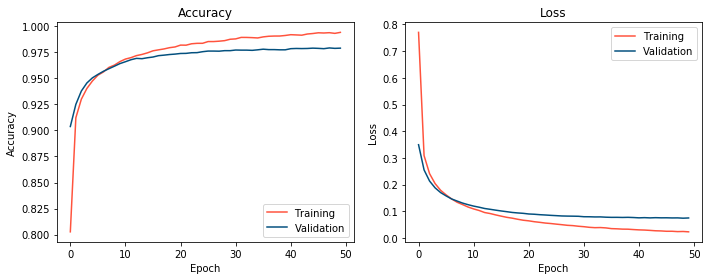

In [72]:
plot_metrics(fit1.history)

In [73]:
def my_predict_generator(x_data,batch_size):
    L = len(x_data)
    while True:
        batch_start = 0
        batch_end = batch_size
        while batch_start < L:
            end = min(batch_end,L)
            x_batch = x_data[batch_start:end]
            yield x_batch
            batch_start += batch_size
            batch_end += batch_size

In [76]:
pred_50 = model.predict_generator(my_predict_generator(X_test_50_np,16),
                        steps=len(X_test_50_np)/16,
                        verbose=1)

625/625 [==============================] - 1s 2ms/step


In [77]:
pred_50

array([[  2.42502264e-12,   1.37639759e-07,   9.99999881e-01, ...,
          1.44933772e-08,   2.28541585e-14,   2.53859162e-16],
       [  5.55297927e-26,   9.65478565e-12,   1.45854601e-14, ...,
          3.73541199e-18,   1.14241234e-12,   1.48239101e-14],
       [  5.96088157e-08,   4.73036943e-09,   6.19732191e-07, ...,
          3.34445760e-09,   9.90810275e-01,   2.08847796e-05],
       ..., 
       [  5.58637175e-13,   9.99997735e-01,   6.90253202e-11, ...,
          1.45873758e-10,   1.26882583e-06,   4.31548981e-12],
       [  6.00400670e-15,   4.40784653e-09,   2.11919805e-11, ...,
          3.20314196e-13,   2.96514147e-09,   2.60209565e-09],
       [  9.99956012e-01,   1.12435494e-09,   4.36532682e-05, ...,
          9.93962601e-08,   5.87256979e-11,   2.91566835e-07]], dtype=float32)

In [81]:
np.sum(np.argmax(pred_50,axis=1) == y_test.values)*100/len(y_test)

98.200000000000003

In [83]:
pred_100 = model1.predict_generator(my_predict_generator(X_test_100_np,16),
                                   steps=len(X_test_100_np)/16,
                                   verbose=1)
pred_100

625/625 [==============================] - 1s 2ms/step


array([[  3.05276194e-06,   1.36098970e-04,   9.98168707e-01, ...,
          1.37892435e-03,   2.68060330e-06,   2.04567755e-07],
       [  1.40326127e-14,   5.48511991e-09,   7.04213354e-09, ...,
          5.03628985e-13,   1.78924289e-08,   2.46231346e-09],
       [  1.15033499e-05,   2.98567306e-06,   1.27072335e-05, ...,
          1.57882998e-04,   9.67172384e-01,   2.80961418e-03],
       ..., 
       [  5.73878167e-10,   9.99544799e-01,   1.30116405e-06, ...,
          1.45559704e-06,   4.10692621e-04,   8.73428192e-08],
       [  1.87241316e-08,   3.59173873e-06,   1.84275859e-06, ...,
          1.66261991e-08,   2.78239213e-06,   5.06437618e-06],
       [  9.98687208e-01,   3.15118587e-06,   1.18095241e-03, ...,
          1.64346366e-05,   1.37227710e-06,   8.10018901e-05]], dtype=float32)

In [85]:
np.sum(np.argmax(pred_100,axis=1) == y_test.values)*100/len(y_test)

97.939999999999998

## SELECT model_pca_50

In [86]:
import json

In [88]:
with open('./model_pca_50_history.json','w') as f:
    json.dump(fit.history,f)

In [89]:
with open('./model_pca_100_history.json','w') as f:
    json.dump(fit1.history,f)